<a href="https://colab.research.google.com/github/NakhwaImad/data_analysis/blob/main/AMT_Static_Model_Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
# Send an HTTP GET request to the URL
# Parse the HTML content of the response
# Find the table containing the data you want to scrape
url = 'https://www.espncricinfo.com/records/most-runs-in-career-83548'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')
print(len(table))

2


In [ ]:
if table:
    # Extract data from the table
    data = []
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        cols = [col.text.strip() for col in cols]
        data.append(cols)

    # Convert the data into a Pandas DataFrame
    df = pd.DataFrame(data)

In [ ]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
1,SR Tendulkar (IND),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
2,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88
3,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
4,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,JP Duminy (SA),2004-2019,199,179,40,5117,150*,36.81,6052,84.55,4,27,7,347,75
92,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,365,74
93,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,449,103
94,Abdul Razzaq (Asia/PAK),1996-2011,265,228,57,5080,112,29.70,6252,81.25,3,23,14,382,124


In [ ]:
#Removing first row that has indices
df = pd.DataFrame(data[1:], columns=data[0])

In [ ]:
print(df)

                         Player       Span  Mat Inns  NO   Runs    HS    Ave  \
0            SR Tendulkar (IND)  1989-2012  463  452  41  18426  200*  44.83   
1   KC Sangakkara (Asia/ICC/SL)  2000-2015  404  380  41  14234   169  41.98   
2          RT Ponting (AUS/ICC)  1995-2012  375  365  39  13704   164  42.03   
3       ST Jayasuriya (Asia/SL)  1989-2011  445  433  18  13430   189  32.36   
4                 V Kohli (IND)  2008-2023  283  271  42  13223   183  57.74   
..                          ...        ...  ...  ...  ..    ...   ...    ...   
90               JP Duminy (SA)  2004-2019  199  179  40   5117  150*  36.81   
91         PD Collingwood (ENG)  2001-2011  197  181  37   5092  120*  35.36   
92              A Symonds (AUS)  1998-2009  198  161  33   5088   156  39.75   
93      Abdul Razzaq (Asia/PAK)  1996-2011  265  228  57   5080   112  29.70   
94            Mahmudullah (BAN)  2007-2023  222  192  50   5020  128*  35.35   

       BF     SR 100  50   0    4s   6s

In [ ]:
#Convert to csv
df.to_csv('cricket.csv')

In [ ]:
#Read data
df = pd.read_csv('cricket.csv')

In [ ]:
df.head()

,Unnamed: 0,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,0,SR Tendulkar (IND),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88
2,2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270
4,4,V Kohli (IND),2008-2023,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142


In [ ]:
df.columns

Index(['Unnamed: 0', 'Player', 'Span', 'Mat', 'Inns', 'NO', 'Runs', 'HS',
       'Ave', 'BF', 'SR', '100', '50', '0', '4s', '6s'],
      dtype='object')

# **Data Cleaning and Processing**

In [ ]:
#Removing Unnamed:0 column
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()


,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,SR Tendulkar (IND),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270
4,V Kohli (IND),2008-2023,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142


In [ ]:
#Checking presence of null values
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
4s        0
6s        0
dtype: int64

In [ ]:
#Checking presence of duplicated values
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
90    False
91    False
92    False
93    False
94    False
Length: 95, dtype: bool

In [ ]:
df['Player'].describe()

count                     95
unique                    95
top       SR Tendulkar (IND)
freq                       1
Name: Player, dtype: object

In [ ]:
#Making a new column country
df[['Player Name', 'Country']] = df['Player'].str.extract(r'(.+)\(([^)]+)\)')


In [ ]:
df['Country'].value_counts()

AUS             14
PAK             10
WI               8
SA               8
IND              8
SL               6
NZ               5
ZIM              5
BAN              4
Asia/SL          3
ENG              3
Asia/PAK         3
Asia/IND         3
AUS/ICC          3
Asia/ICC/IND     2
ICC/WI           2
Afr/SA           2
ENG/IRE          1
Afr/ICC/SA       1
ICC/NZ           1
Asia/ICC/PAK     1
Asia/ICC/SL      1
IRE              1
Name: Country, dtype: int64

In [ ]:
#Removing wrong country data
df['Country'] = df['Country'].str.replace(r'(Asia|ICC|Afr|/)', '', regex=True)

# Remove leading and trailing whitespace
df['Country'] = df['Country'].str.strip()

In [ ]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Player Name,Country
0,SR Tendulkar (IND),1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,SR Tendulkar,IND
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,KC Sangakkara,SL
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,RT Ponting,AUS
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,ST Jayasuriya,SL
4,V Kohli (IND),2008-2023,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,V Kohli,IND


In [ ]:
#Dropping player column
df.drop(columns=['Player'],inplace=True)

In [ ]:
#Making player name column as first in the dataset
df.insert(0, 'Player Name', df.pop('Player Name'))


In [ ]:
df.head()

,Player Name,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country
0,SR Tendulkar,1989-2012,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,IND
1,KC Sangakkara,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL
2,RT Ponting,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS
3,ST Jayasuriya,1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL
4,V Kohli,2008-2023,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND


In [ ]:

df[['Start Year', 'End Year']] = df['Span'].str.split('-', expand=True)
#Convert 'Start Year' and 'End Year' to numeric data types
df['Start Year'] = pd.to_numeric(df['Start Year'])
df['End Year'] = pd.to_numeric(df['End Year'])
#Optionally, you can calculate the duration of the span.
df['Span Duration(Years) '] = df['End Year'] - df['Start Year']
#Drop the original 'Span' column if no longer needed
df.drop('Span', axis=1, inplace=True)


In [ ]:
df.head()

,Player Name,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years)
0,SR Tendulkar,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,IND,1989,2012,23
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL,2000,2015,15
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS,1995,2012,17
3,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL,1989,2011,22
4,V Kohli,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND,2008,2023,15


In [ ]:
#Rename columns
df.rename(columns={
    'Mat': 'Matches',
    'NO': 'Not Out',
    'HS': 'Highest',
    'Ave': 'Average',
    'BF': 'Balls Faced'
}, inplace=True)

In [ ]:
df.head(15)

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years)
0,SR Tendulkar,463,452,41,18426,200*,44.83,21368,86.23,49,96,20,2016,195,IND,1989,2012,23
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL,2000,2015,15
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS,1995,2012,17
3,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL,1989,2011,22
4,V Kohli,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND,2008,2023,15
5,DPMD Jayawardene,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1119,76,SL,1998,2015,17
6,Inzamam-ul-Haq,378,350,53,11739,137*,39.52,15812,74.24,10,83,20,971,144,PAK,1991,2007,16
7,JH Kallis,328,314,53,11579,139,44.36,15885,72.89,17,86,17,911,137,SA,1996,2014,18
8,SC Ganguly,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1122,190,IND,1992,2007,15
9,R Dravid,344,318,40,10889,153,39.16,15285,71.23,12,83,13,950,42,IND,1996,2011,15


In [ ]:
# Removing * from highest
df['Highest'] = df['Highest'].str.replace('*', '', regex=True)


In [ ]:
df.dtypes

Player Name               object
Matches                    int64
Inns                       int64
Not Out                    int64
Runs                       int64
Highest                   object
Average                  float64
Balls Faced                int64
SR                       float64
100                       object
50                         int64
0                          int64
4s                        object
6s                        object
Country                   object
Start Year                 int64
End Year                   int64
Span Duration(Years)       int64
dtype: object

In [ ]:
# Replace hyphens with zeros in the '100' column
df['100'] = df['100'].str.replace('-', '0')


In [ ]:
df['4s'] = df['4s'].str.replace('+', '')
df['6s'] = df['6s'].str.replace('+', '')

<ipython-input-30-32d8028095d5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['4s'] = df['4s'].str.replace('+', '')
<ipython-input-30-32d8028095d5>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['6s'] = df['6s'].str.replace('+', '')


In [ ]:
#Converting to int type
df['100'] = df['100'].astype(int)
df['Highest'] = df['Highest'].astype(int)
df['4s'] = df['4s'].astype(int)
df['6s'] = df['6s'].astype(int)


In [ ]:
df['6s'].value_counts()

44     3
53     3
56     2
49     2
86     2
      ..
57     1
15     1
147    1
155    1
78     1
Name: 6s, Length: 81, dtype: int64

In [ ]:
#Calculating boundary percentage
df['Boundary Percentage'] = ((df['4s'] + df['6s']) / df['Runs']) * 100

In [ ]:
df.head(15)

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years),Boundary Percentage
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,96,20,2016,195,IND,1989,2012,23,11.999349
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL,2000,2015,15,10.348461
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS,1995,2012,17,10.164915
3,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL,1989,2011,22,13.179449
4,V Kohli,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND,2008,2023,15,10.436361
5,DPMD Jayawardene,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1119,76,SL,1998,2015,17,9.446640
6,Inzamam-ul-Haq,378,350,53,11739,137,39.52,15812,74.24,10,83,20,971,144,PAK,1991,2007,16,9.498254
7,JH Kallis,328,314,53,11579,139,44.36,15885,72.89,17,86,17,911,137,SA,1996,2014,18,9.050868
8,SC Ganguly,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1122,190,IND,1992,2007,15,11.546247
9,R Dravid,344,318,40,10889,153,39.16,15285,71.23,12,83,13,950,42,IND,1996,2011,15,9.110111


In [ ]:
df.dtypes

Player Name               object
Matches                    int64
Inns                       int64
Not Out                    int64
Runs                       int64
Highest                    int64
Average                  float64
Balls Faced                int64
SR                       float64
100                        int64
50                         int64
0                          int64
4s                         int64
6s                         int64
Country                   object
Start Year                 int64
End Year                   int64
Span Duration(Years)       int64
Boundary Percentage      float64
dtype: object

In [ ]:
df['Boundary Percentage']= df['Boundary Percentage'].astype(int)

In [ ]:
df.head(15)

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years),Boundary Percentage
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,96,20,2016,195,IND,1989,2012,23,11
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL,2000,2015,15,10
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS,1995,2012,17,10
3,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL,1989,2011,22,13
4,V Kohli,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND,2008,2023,15,10
5,DPMD Jayawardene,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1119,76,SL,1998,2015,17,9
6,Inzamam-ul-Haq,378,350,53,11739,137,39.52,15812,74.24,10,83,20,971,144,PAK,1991,2007,16,9
7,JH Kallis,328,314,53,11579,139,44.36,15885,72.89,17,86,17,911,137,SA,1996,2014,18,9
8,SC Ganguly,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1122,190,IND,1992,2007,15,11
9,R Dravid,344,318,40,10889,153,39.16,15285,71.23,12,83,13,950,42,IND,1996,2011,15,9


In [ ]:
import datetime
# Get the current year (2023)
current_year = datetime.datetime.now().year
# Create a new column 'Player Status'
df['Player Status'] = df.apply(lambda row: 'Retired' if row['End Year'] < current_year else 'Active', axis=1)


In [ ]:
df.head(25)

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years),Boundary Percentage,Player Status
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,96,20,2016,195,IND,1989,2012,23,11,Retired
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL,2000,2015,15,10,Retired
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS,1995,2012,17,10,Retired
3,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL,1989,2011,22,13,Retired
4,V Kohli,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND,2008,2023,15,10,Active
5,DPMD Jayawardene,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1119,76,SL,1998,2015,17,9,Retired
6,Inzamam-ul-Haq,378,350,53,11739,137,39.52,15812,74.24,10,83,20,971,144,PAK,1991,2007,16,9,Retired
7,JH Kallis,328,314,53,11579,139,44.36,15885,72.89,17,86,17,911,137,SA,1996,2014,18,9,Retired
8,SC Ganguly,311,300,23,11363,183,41.02,15416,73.70,22,72,16,1122,190,IND,1992,2007,15,11,Retired
9,R Dravid,344,318,40,10889,153,39.16,15285,71.23,12,83,13,950,42,IND,1996,2011,15,9,Retired


In [ ]:
df.sample(20)

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years),Boundary Percentage,Player Status
79,Babar Azam,110,107,12,5424,158,57.09,6102,88.88,19,28,4,489,56,PAK,2015,2023,8,10,Active
15,Mohammad Yousuf,288,273,40,9720,141,41.71,12942,75.10,15,64,15,785,90,PAK,1998,2010,12,9,Retired
6,Inzamam-ul-Haq,378,350,53,11739,137,39.52,15812,74.24,10,83,20,971,144,PAK,1991,2007,16,9,Retired
17,AB de Villiers,228,218,39,9577,176,53.50,9473,101.09,25,53,7,840,204,SA,2005,2018,13,10,Retired
14,RG Sharma,253,245,36,10243,264,49.00,11260,90.96,31,52,16,944,297,IND,2007,2023,16,12,Active
61,RB Richardson,224,217,30,6248,122,33.41,9801,63.74,5,44,8,541,54,WI,1983,1996,13,9,Retired
94,Mahmudullah,222,192,50,5020,128,35.35,6601,76.04,3,27,9,374,78,BAN,2007,2023,16,9,Active
76,WJ Cronje,188,175,31,5565,112,38.64,7277,76.47,2,39,8,366,94,SA,1992,2000,8,8,Retired
19,PA de Silva,308,296,30,9284,145,34.90,11443,81.13,11,64,17,712,102,SL,1984,2003,19,8,Retired
56,KS Williamson,161,153,16,6554,148,47.83,8094,80.97,13,42,5,594,51,NZ,2010,2023,13,9,Active


In [ ]:
df.isnull().sum()

Player Name              0
Matches                  0
Inns                     0
Not Out                  0
Runs                     0
Highest                  0
Average                  0
Balls Faced              0
SR                       0
100                      0
50                       0
0                        0
4s                       0
6s                       0
Country                  0
Start Year               0
End Year                 0
Span Duration(Years)     0
Boundary Percentage      0
Player Status            0
dtype: int64

In [ ]:
df

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,50,0,4s,6s,Country,Start Year,End Year,Span Duration(Years),Boundary Percentage,Player Status
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,96,20,2016,195,IND,1989,2012,23,11,Retired
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,93,15,1385,88,SL,2000,2015,15,10,Retired
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1231,162,AUS,1995,2012,17,10,Retired
3,ST Jayasuriya,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1500,270,SL,1989,2011,22,13,Retired
4,V Kohli,283,271,42,13223,183,57.74,14122,93.63,47,68,15,1238,142,IND,2008,2023,15,10,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,JP Duminy,199,179,40,5117,150,36.81,6052,84.55,4,27,7,347,75,SA,2004,2019,15,8,Retired
91,PD Collingwood,197,181,37,5092,120,35.36,6614,76.98,5,26,7,365,74,ENG,2001,2011,10,8,Retired
92,A Symonds,198,161,33,5088,156,39.75,5504,92.44,6,30,15,449,103,AUS,1998,2009,11,10,Retired
93,Abdul Razzaq,265,228,57,5080,112,29.70,6252,81.25,3,23,14,382,124,PAK,1996,2011,15,9,Retired


In [ ]:
df['Player Status'].value_counts()

Retired    81
Active     14
Name: Player Status, dtype: int64

# **Visualizations**

**1) What is the most common batting average range among the players?**

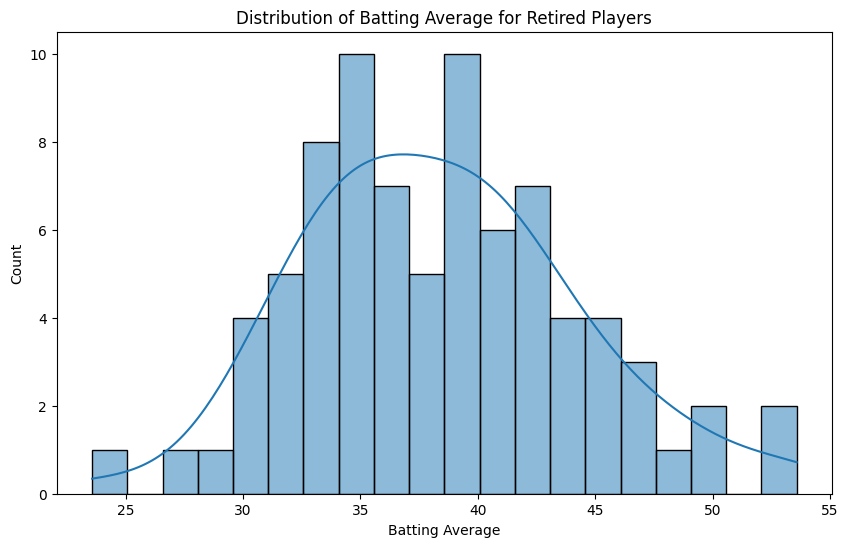

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Player Status'] == 'Retired'], x='Average', bins=20, kde=True)
plt.xlabel('Batting Average')
plt.title('Distribution of Batting Average for Retired Players')
plt.show()


**2) How did the runs scored by top retired players evolve over time?**

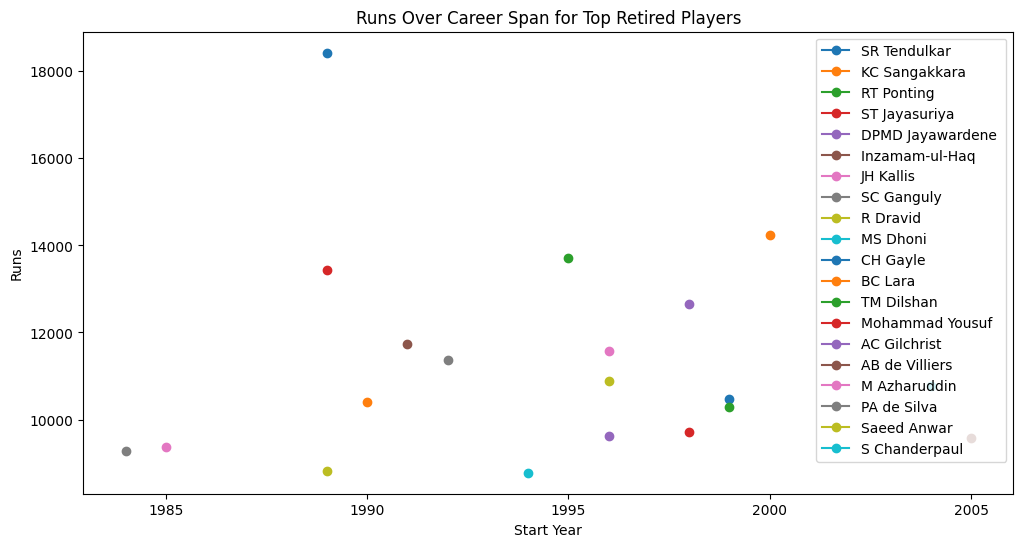

In [ ]:
top_retired_players = df[df['Player Status'] == 'Retired'].nlargest(20, 'Runs')
plt.figure(figsize=(12, 6))
for player in top_retired_players['Player Name']:
    player_data = df[(df['Player Name'] == player) & (df['Player Status'] == 'Retired')]
    plt.plot(player_data['Start Year'], player_data['Runs'], marker='o', label=player)
plt.xlabel('Start Year')
plt.ylabel('Runs')
plt.title('Runs Over Career Span for Top Retired Players')
plt.legend()
plt.show()

**3) Which countries have produced the highest number of legendary batsmen?**

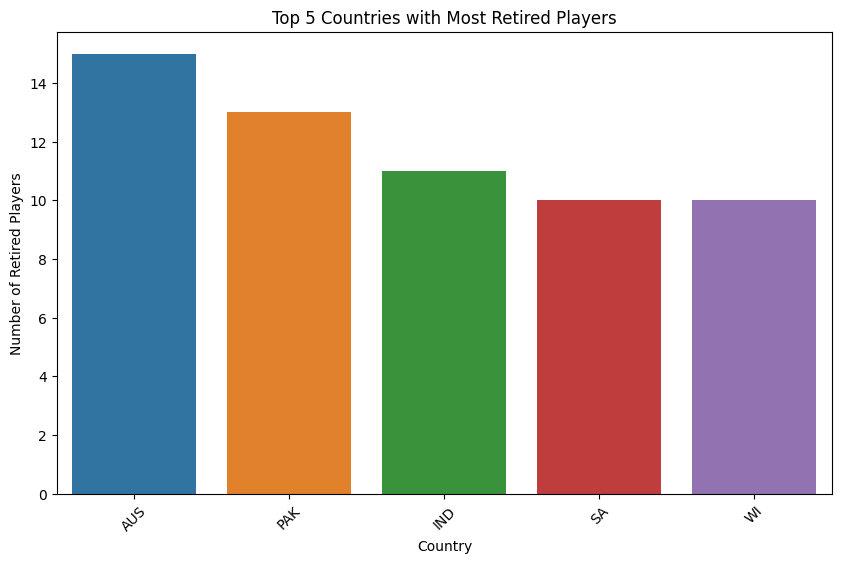

In [ ]:
top_5_countries = df[df['Player Status'] == 'Retired']['Country'].value_counts().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_countries.index, y=top_5_countries.values)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Number of Retired Players')
plt.title('Top 5 Countries with Most Retired Players')
plt.show()

**4) In which years did the retired players make their debut?**

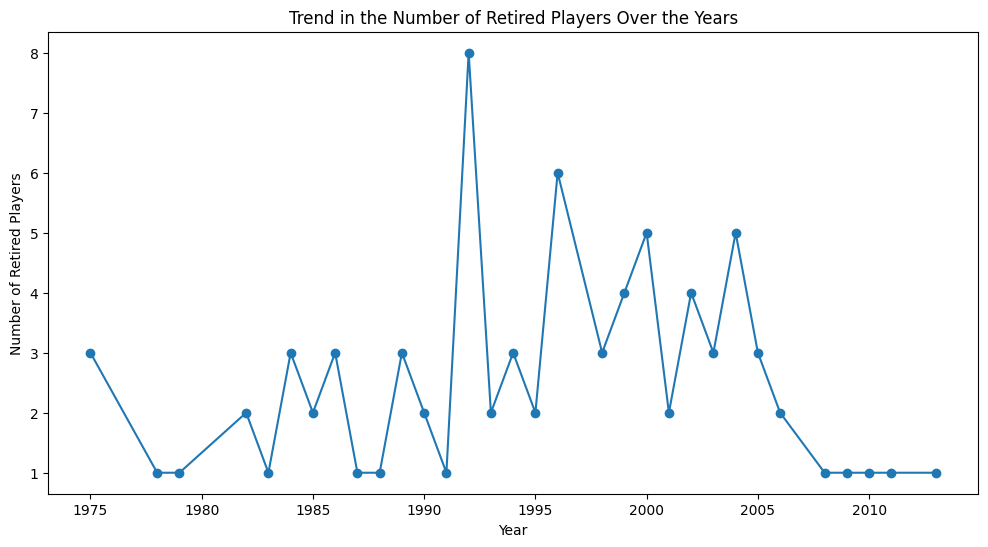

In [ ]:
retired_players_by_year = df[df['Player Status'] == 'Retired']['Start Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(retired_players_by_year.index, retired_players_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Retired Players')
plt.title('Trend in the Number of Retired Players Over the Years')
plt.show()


**5) Are there strong correlations between any pair of numeric variables for retired players?**

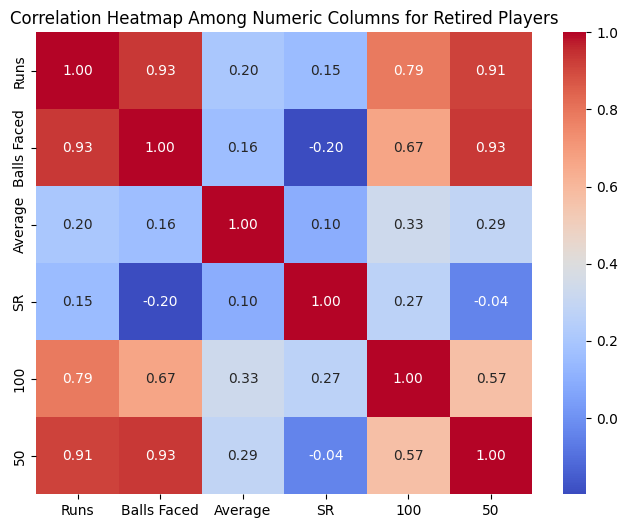

In [ ]:
numeric_cols = ['Runs', 'Balls Faced', 'Average', 'SR', '100', '50']
corr_matrix = df[df['Player Status'] == 'Retired'][numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap Among Numeric Columns for Retired Players')
plt.show()

**6) How much proportion of runs were scored in sixes and fours?**

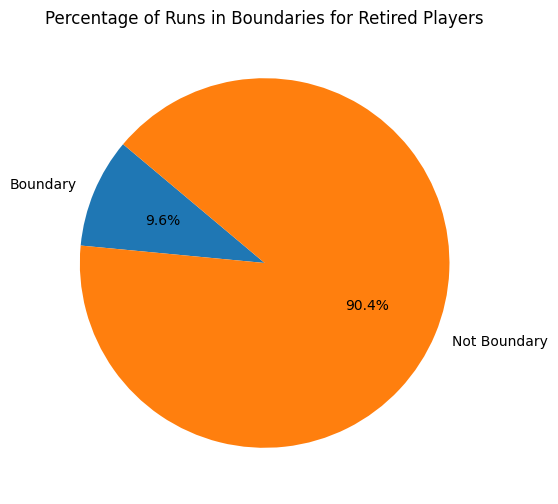

In [ ]:
avg_boundary_percentage = df[df['Player Status'] == 'Retired']['Boundary Percentage'].mean()
plt.figure(figsize=(6, 6))
plt.pie([avg_boundary_percentage, 100 - avg_boundary_percentage], labels=['Boundary', 'Not Boundary'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Runs in Boundaries for Retired Players')
plt.show()

**7) What is the relationship between balls faced and runs scored for retired players with different batting averages?**

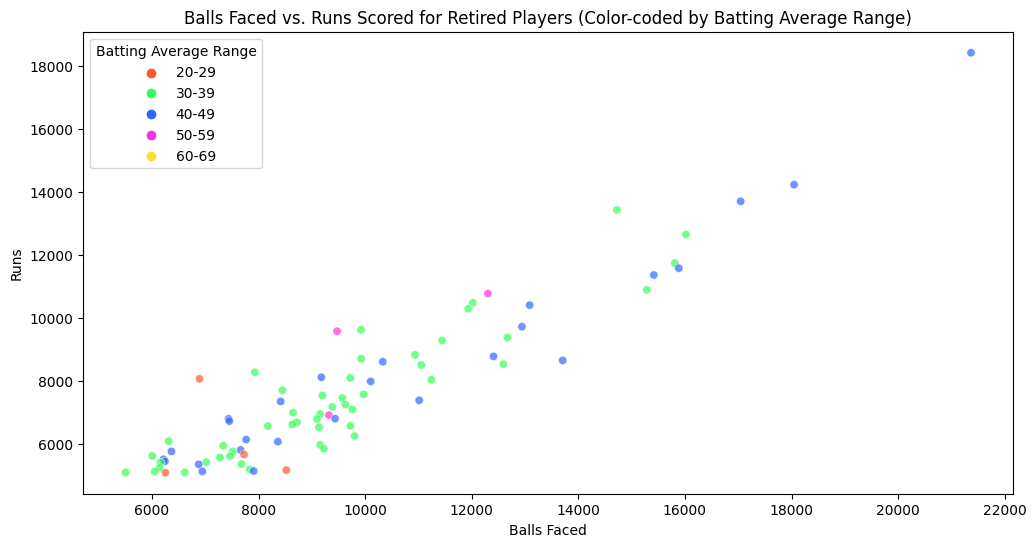

In [ ]:
# Define custom color palette and color mapping for batting average ranges
custom_palette = {
    '20-29': '#FF5733',
    '30-39': '#33FF57',
    '40-49': '#3366FF',
    '50-59': '#FF33DD',
    '60-69': '#FFDD33'
}

# Create a new column 'Batting Average Range' based on the batting average
df['Batting Average Range'] = pd.cut(df['Average'], bins=[20, 30, 40, 50, 60, 70], labels=['20-29', '30-39', '40-49', '50-59', '60-69'])

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df[df['Player Status'] == 'Retired'], x='Balls Faced', y='Runs', hue='Batting Average Range', palette=custom_palette, alpha=0.7)
plt.xlabel('Balls Faced')
plt.ylabel('Runs')
plt.title('Balls Faced vs. Runs Scored for Retired Players (Color-coded by Batting Average Range)')
plt.legend(title='Batting Average Range')
plt.show()


**8) What is the distribution of Strike Rates of the retired players?**

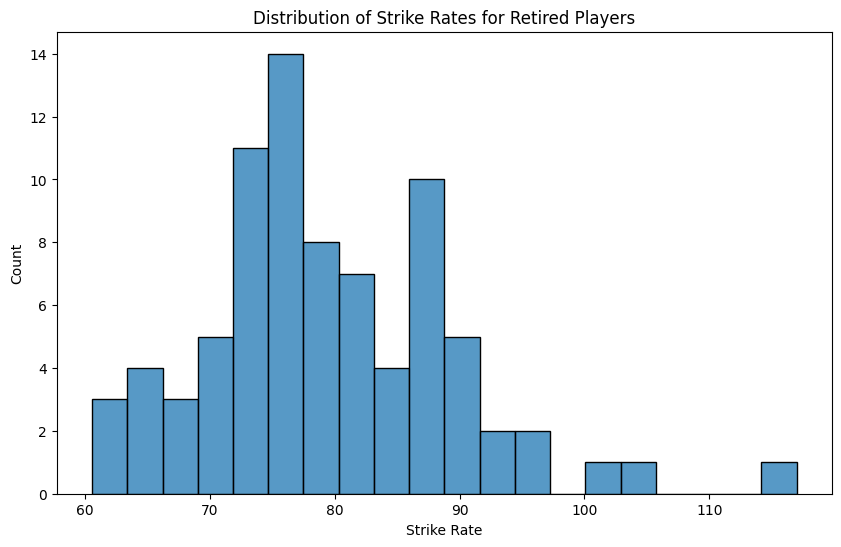

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Player Status'] == 'Retired'], x='SR', bins=20, kde=False)
plt.xlabel('Strike Rate')
plt.title('Distribution of Strike Rates for Retired Players')
plt.show()


In [ ]:
df.dtypes

Player Name                object
Matches                     int64
Inns                        int64
Not Out                     int64
Runs                        int64
Highest                     int64
Average                   float64
Balls Faced                 int64
SR                        float64
100                         int64
50                          int64
0                           int64
4s                          int64
6s                          int64
Country                    object
Start Year                  int64
End Year                    int64
Span Duration(Years)        int64
Boundary Percentage         int64
Player Status              object
Batting Average Range    category
dtype: object

In [ ]:
#Selecting only retired players
df_retired = df[df['Player Status'] == 'Retired']

In [ ]:
#We will consider following factors to determine the best playing XI
#Giving equal weights to all

criteria = {
    'Average': 1,
    'SR': 1,
    '100': 1,
    '50': 1,
    'Boundary Percentage': 1,
    'Not Out': 1
}

In [ ]:
#Calculating the score based on above factors
df_retired['Combined Score'] = df_retired.apply(
    lambda row: sum(row[metric] * weight for metric, weight in criteria.items()),
    axis=1
)
# Sort the DataFrame by the combined score in descending order
df_retired = df_retired.sort_values(by='Combined Score', ascending=False)


<ipython-input-115-a484aacc12a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_retired['Combined Score'] = df_retired.apply(


In [ ]:
df_retired

,Player Name,Matches,Inns,Not Out,Runs,Highest,Average,Balls Faced,SR,100,...,4s,6s,Country,Start Year,End Year,Span Duration(Years),Boundary Percentage,Player Status,Batting Average Range,Combined Score
0,SR Tendulkar,463,452,41,18426,200,44.83,21368,86.23,49,...,2016,195,IND,1989,2012,23,11,Retired,40-49,328.06
10,MS Dhoni,350,297,84,10773,183,50.57,12303,87.56,10,...,826,229,IND,2004,2019,15,9,Retired,50-59,314.13
1,KC Sangakkara,404,380,41,14234,169,41.98,18048,78.86,25,...,1385,88,SL,2000,2015,15,10,Retired,40-49,289.84
2,RT Ponting,375,365,39,13704,164,42.03,17046,80.39,30,...,1231,162,AUS,1995,2012,17,10,Retired,40-49,283.42
7,JH Kallis,328,314,53,11579,139,44.36,15885,72.89,17,...,911,137,SA,1996,2014,18,9,Retired,40-49,282.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,DC Boon,181,177,16,5964,122,37.04,9157,65.13,5,...,494,16,AUS,1984,1995,11,8,Retired,30-39,168.17
68,Ramiz Raja,198,197,15,5841,119,32.09,9226,63.31,9,...,469,14,PAK,1985,1997,12,8,Retired,30-39,158.40
86,RS Mahanama,213,198,23,5162,119,29.49,8521,60.57,4,...,331,17,SL,1986,1999,13,6,Retired,20-29,158.06
85,ADR Campbell,188,184,14,5185,131,30.50,7834,66.18,7,...,427,44,ZIM,1992,2003,11,9,Retired,30-39,156.68


In [ ]:
#This is the best playing XI
best_playing_xi = df_retired.head(11)

In [ ]:
print(best_playing_xi['Player Name'])

0         SR Tendulkar 
10            MS Dhoni 
1        KC Sangakkara 
2           RT Ponting 
7            JH Kallis 
17      AB de Villiers 
6       Inzamam-ul-Haq 
5     DPMD Jayawardene 
9             R Dravid 
47            MG Bevan 
24         LRPL Taylor 
Name: Player Name, dtype: object
